In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [3]:
colnames=['label','message'] 
df = pd.read_csv("D:\Downloads\SMS\spam.csv",names=colnames,encoding='Windows-1252',header=None)

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(-0.5, 1599.5, 799.5, -0.5)

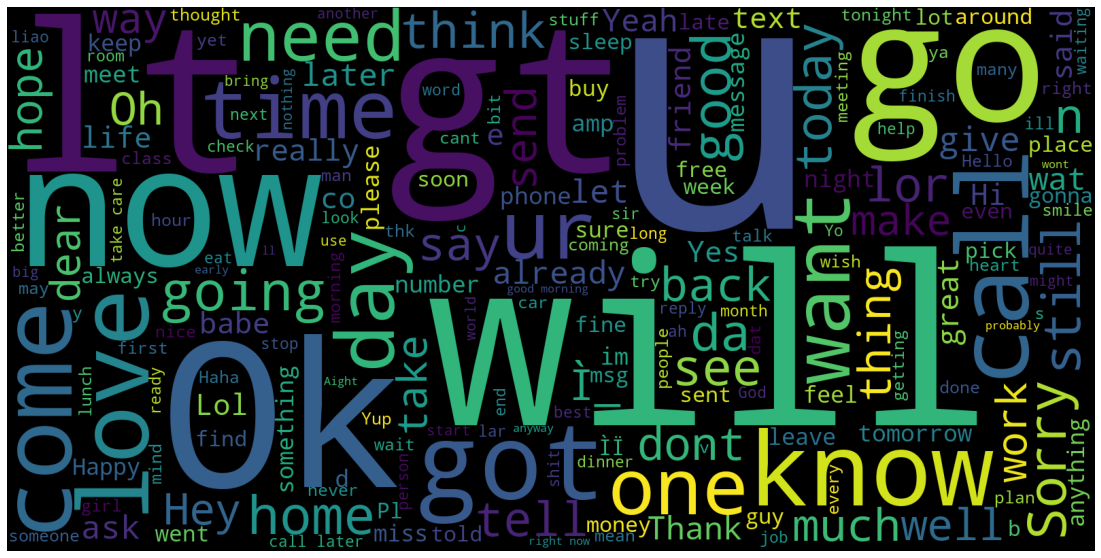

In [7]:
ms1 = pd.Series((df.loc[df['label']=='ham','message']).tolist()).astype(str)
wordcloud = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(ms1))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 1599.5, 799.5, -0.5)

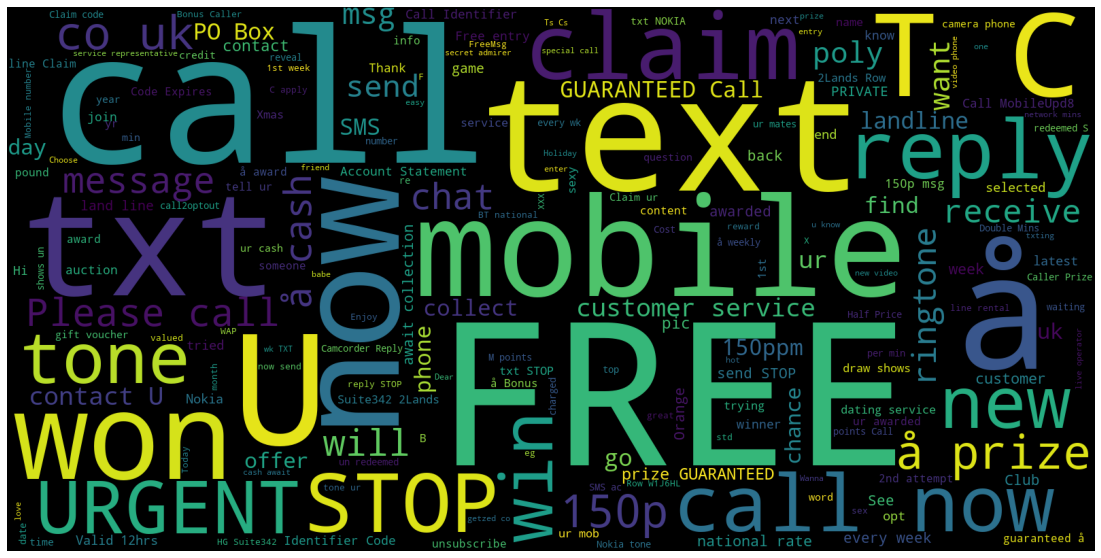

In [8]:
ms2 = pd.Series((df.loc[df['label']=='spam','message']).tolist()).astype(str)
wordcloud = WordCloud(stopwords=STOPWORDS,width=1600,height=800,background_color='black').generate(" ".join(ms2))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [9]:
lemmatizer = WordNetLemmatizer()
corpus = []

In [10]:
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review if not i in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense,Dropout,LSTM,Embedding
from keras.models import Sequential,load_model

In [12]:
token = Tokenizer()
token.fit_on_texts(corpus)
text_to_seq = token.texts_to_sequences(corpus)

In [13]:
max_length_sequence = max([len(i) for i in text_to_seq])
padded_seq = pad_sequences(text_to_seq, maxlen=max_length_sequence, padding="pre")

In [14]:
padded_seq

array([[   0,    0,    0, ...,   16, 3551,   70],
       [   0,    0,    0, ...,  359,    1, 1610],
       [   0,    0,    0, ...,  218,   29,  293],
       ...,
       [   0,    0,    0, ..., 7042, 1095, 3547],
       [   0,    0,    0, ...,  842,    1,   10],
       [   0,    0,    0, ..., 2198,  347,  152]])

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['label'])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(padded_seq,y,test_size=0.25,random_state=42)

In [17]:
X_train.shape

(4179, 77)

In [18]:
TOT_SIZE = len(token.word_index) + 1
model = Sequential()
#IP Layer
model.add(Embedding(TOT_SIZE,32,input_length=max_length_sequence))
model.add(LSTM(units=50, activation = 'relu',return_sequences=True))
model.add(Dropout(0.2))
#Layer2
model.add(LSTM(units=60, activation = 'relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(units=1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 32)            225408    
                                                                 
 lstm (LSTM)                 (None, 77, 50)            16600     
                                                                 
 dropout (Dropout)           (None, 77, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60)                26640     
                                                                 
 dropout_1 (Dropout)         (None, 60)                0         
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 268,709
Trainable params: 268,709
Non-trai

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
131/131 [==============================] - 11s 59ms/step - loss: 0.3644 - accuracy: 0.8789 - val_loss: 0.1158 - val_accuracy: 0.9605
Epoch 2/10
131/131 [==============================] - 7s 52ms/step - loss: 0.0664 - accuracy: 0.9832 - val_loss: 0.0651 - val_accuracy: 0.9835
Epoch 3/10
131/131 [==============================] - 7s 56ms/step - loss: 221.6196 - accuracy: 0.9873 - val_loss: 0.4054 - val_accuracy: 0.9713
Epoch 4/10
131/131 [==============================] - 7s 52ms/step - loss: 108.4580 - accuracy: 0.9459 - val_loss: 0.2430 - val_accuracy: 0.9749
Epoch 5/10
131/131 [==============================] - 7s 55ms/step - loss: 0.1619 - accuracy: 0.9878 - val_loss: 0.1486 - val_accuracy: 0.9792
Epoch 6/10
131/131 [==============================] - 7s 54ms/step - loss: 0.3008 - accuracy: 0.9931 - val_loss: 0.1410 - val_accuracy: 0.9828
Epoch 7/10
131/131 [==============================] - 7s 54ms/step - loss: 0.0835 - accuracy: 0.9955 - val_loss: 0.1428 - val_accuracy: 0

In [22]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 17ms/step - loss: 0.2970 - accuracy: 0.9799


[0.2969810962677002, 0.979899525642395]

In [23]:
from pickle import dump,load
tfid = 'tfid.sav'
lstm = 'lstm.sav'

In [24]:
dump(token,open(tfid,'wb'))
model.save('nlp.h5')

In [25]:
def preprocess(raw_mess):
    review = re.sub('[^a-zA-Z]',' ',raw_mess)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(i) for i in review if not i in set(stopwords.words('english'))]
    review = ' '.join(review)
    return review

In [26]:
def predict(mess):
    vect = load(open(tfid,'rb'))
    classifier = load_model('nlp.h5')
    clean = preprocess(mess)
    text_to_seq = token.texts_to_sequences([mess])
    padded_seq = pad_sequences(text_to_seq, maxlen=77, padding="pre")
    pred = classifier.predict(padded_seq)
    return pred

In [45]:
msg = input("Enter a message: ")
predi = predict(msg)
if predi >= 0.6:
    print("It is a spam")
else:
    print("Not a spam")

Enter a message: You have won a cash prize of 3000RS!!! Click to claim reward!
1/1 [==============================] - 0s 367ms/step
It is a spam


In [47]:
msg = input("Enter a message: ")
predi = predict(msg)
if predi >= 0.6:
    print("It is a spam")
else:
    print("Not a spam")

Enter a message: Hello. Hope you are fine. Respond asap
1/1 [==============================] - 0s 322ms/step
Not a spam
